# Clustering: Gamma Ray Bursts

## WIP - Unfinished!!!

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import sklearn
from sklearn.cluster import (KMeans, MeanShift, estimate_bandwidth)
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 12

In [21]:
#File fetch and read

# Download file
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt')
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names= np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])

In [22]:
names

array(['GRB_name', 'GRB_name_Fermi', 'T0', 'ra', 'decl', 'pos_error',
       'T90', 'T90_error', 'T90_start', 'fluence', 'fluence_error',
       'redshift', "'T100'", 'GBM_located', 'mjd_(T0)'], dtype='<U14')

In [23]:
data.T

array([['GRB230421A*', 'GRB230421405', '9:42:41.253', ..., '9.7280',
        'True', '60055.40464413'],
       ['GRB230420A', 'None', '10:19:01', ..., '111.7500', 'False',
        '60054.42987269'],
       ['GRB230419A*', 'GRB230419568', '13:37:43.335', ..., '0.2560',
        'True', '60053.56786267'],
       ...,
       ['GRB910424A*', 'None', '19:43:25.064', ..., '3.1360', 'False',
        '48370.82181787'],
       ['GRB910423A*', 'None', '19:51:15.804', ..., '208.5760', 'False',
        '48369.82726625'],
       ['GRB910421A*', 'None', '9:14:03.800', ..., '5.6960', 'False',
        '48367.38476620']], dtype='<U14')

In [24]:
#Column splicing

#They're read as strings!!! Converting is mandatory
T90 = np.array(data[6, :], dtype=float)
flux = np.array(data[9, :], dtype=float)



In [103]:
#Filtering good data
filter = (T90 > 0) & (flux > 0)     #Mask

T90clean = T90[filter]
flux_clean = flux[filter]

[]

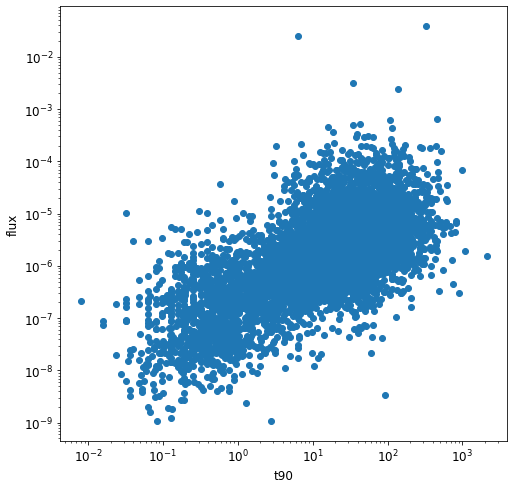

In [104]:
plt.scatter(T90clean, flux_clean)
plt.xlabel('t90')
plt.ylabel('flux')
plt.loglog()


### K-means clustering with 2 n_clusters

In [115]:
#Reshaping, sklearn is picky!!

print(T90clean.shape)
print(flux_clean.shape)

new_T90clean = T90clean[:, np.newaxis]
new_flux_clean = flux_clean[:, np.newaxis]

print(new_T90clean.shape)
print(new_flux_clean.shape)

#Constructing the dataset, formatted as sklearn input (rows[n_samples] x columns[1])
to_fit = np.column_stack([new_T90clean, new_flux_clean])
to_fit.shape


(6975,)
(6975,)
(6975, 1)
(6975, 1)


(6975, 2)

In [118]:
#KMeans Cluster initialization
cluster = KMeans(n_clusters=2)

#Since I then plot in loglog, I transform input data in loglog form

to_fit = np.log(to_fit)
to_fit.shape


(6975, 2)

In [119]:

#Training the model
cluster.fit(to_fit)

#Clusters positions
centers = cluster.cluster_centers_

#Labels characterizing each cluster
labels = cluster.predict(to_fit)

print(centers.shape)
print(labels.shape)

(2, 2)
(6975,)


Text(0.5, 1.0, 'Clustering output')

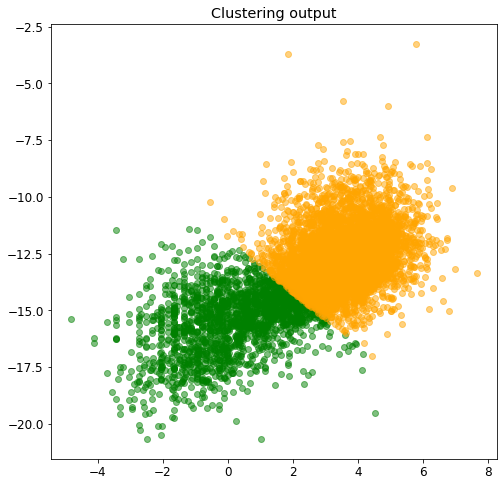

In [122]:
# plot the data color-coded by cluster id

colors = ['green', 'orange']
for i in range(2):
    plt.scatter(x=to_fit[labels==i,0], y=to_fit[labels==i,1], 
                color=colors[i],alpha=0.5)


#Because of the way in which I trained the cluster, the plot is already in loglog
#plt.loglog()

plt.title('Clustering output')

### K-means clustering with 4 n_clusters

In [123]:
#Reshaping, sklearn is picky!!

print(T90clean.shape)
print(flux_clean.shape)

new_T90clean = T90clean[:, np.newaxis]
new_flux_clean = flux_clean[:, np.newaxis]

print(new_T90clean.shape)
print(new_flux_clean.shape)

#Constructing the dataset, formatted as sklearn input (rows[n_samples] x columns[1])
to_fit = np.column_stack([new_T90clean, new_flux_clean])
to_fit.shape


(6975,)
(6975,)
(6975, 1)
(6975, 1)


(6975, 2)

In [124]:
#KMeans Cluster initialization
cluster = KMeans(n_clusters=4)

#Since I then plot in loglog, I transform input data in loglog form

to_fit = np.log(to_fit)
to_fit.shape


(6975, 2)

In [125]:

#Training the model
cluster.fit(to_fit)

#Clusters positions
centers = cluster.cluster_centers_

#Labels characterizing each cluster
labels = cluster.predict(to_fit)

print(centers.shape)
print(labels.shape)

(4, 2)
(6975,)


Text(0.5, 1.0, 'Clustering output')

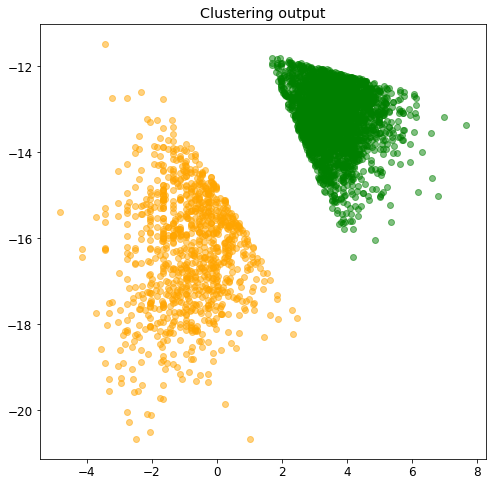

In [127]:
# plot the data color-coded by cluster id

colors = ['green', 'orange', 'red', 'blue']
for i in range(2):
    plt.scatter(x=to_fit[labels==i,0], y=to_fit[labels==i,1], 
                color=colors[i],alpha=0.5)


#Because of the way in which I trained the cluster, the plot is already in loglog
#plt.loglog()

plt.title('Clustering output')

### Mean-Shift Clustering

In [139]:
# Compute the Mean-shift clustering


scaler = preprocessing.StandardScaler()

#Manually setting the bandwitdh
#bandwidth = 1

#Exploiting implemented technique to estimate best bandwith, for large dataset is slow!
bandwidth = estimate_bandwidth(to_fit)

ms = MeanShift(bandwidth=bandwidth, 
               bin_seeding=True, 
               cluster_all=True)
ms.fit(to_fit)
#ms.fit(scaler.fit_transform(to_fit))

labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique >= 0])

print(labels_unique)
print('Bandwidth: ', bandwidth)
print("number of estimated clusters :", n_clusters)



[0 1 2]
Bandwidth:  2.1158614643466183
number of estimated clusters : 3
